[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorials/6_nb_model_assessment.ipynb) 


# Chapter 6 - Prediction model evaluation 
We have learned about logistic regression and CART in the fifths chapter of the course introduces two popular algorithms for supervised learning, the logistic regression model and classification and regression trees (CART). Today, we examine practices to assess these approaches in terms of predictive accuracy. Remember that accuracy is not the only relevant dimension of model performance. Also remember that both logit and trees could also be considered for *explanatory* modeling, which would imply use of yet different evaluation criteria. Here, however, our focus is prediction. Further, we will focus on models for classification. Measuring the predictive accuracy of a regression model is straightforward and calculating indicators such as MSE, MAE, MAPE, and the like. Once you can assess a classification model, you will have no problems whatsoever to assess a regression model.  

The outline of the tutorial is as follows:
- Preliminaries
- Forecast accuracy in classification
- Data partitioning and organization

# Preliminaries
As usual, it makes sense to import a set of standard libraries before moving on. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
# Some configuration of the plots we will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)



## Data
Further, here and in future tutorials, we will need some data to play with. Given our focus on classification and given that we know the data quite well by now, we will continue with the **HMEQ data set**. So let's load this data set as well, whereby we make use of the prepared version from [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) which is readily available in our [GitHub repo](https://github.com/Humboldt-WI/bads). Just return to [tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) if you need a refresher.

In [4]:
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq_modeling.csv' 
df = pd.read_csv(data_url, index_col="index")
df.head(5) 

,BAD,LOAN,MORTDUE,VALUE,YOJ,CLAGE,NINQ,CLNO,DEBTINC,DEROGzero,REASON_HomeImp,REASON_IsMissing,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,DELINQcat_1,DELINQcat_1+
index,,,,,,,,,,,,,,,,,,,
0,True,-1.832283,-1.295882,-1.335526,0.266788,-1.075278,-0.065054,-1.297476,0.137456,True,1,0,0,1,0,0,0,0,0
1,True,-1.810666,-0.013474,-0.672699,-0.236615,-0.723092,-0.826792,-0.756608,0.137456,True,1,0,0,1,0,0,0,0,1
2,True,-1.789048,-1.654549,-1.839275,-0.668103,-0.368769,-0.065054,-1.189302,0.137456,True,1,0,0,1,0,0,0,0,0
3,True,-1.789048,-0.159552,-0.202559,-0.236615,-0.061033,-0.065054,-0.107566,0.137456,True,0,1,0,1,0,0,0,0,0
4,False,-1.767431,0.791699,0.311107,-0.811933,-1.088528,-0.826792,-0.756608,0.137456,True,1,0,1,0,0,0,0,0,0


## Prediction models
Finally, since we aim at assessing predictions, we need to obtain some predictions in the first place. Hence, let's quickly build a logit and tree model for our data set. 

In [ ]:
# Split data into target and features
X = df.drop(['BAD'], axis=1) #code the variables in the most standard way for your usage
y = df[['BAD']]

In [10]:
# Estimate a logit model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='none', fit_intercept=True)
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Estimate a CART tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Forecast accuracy in classification

## Continuous and discrete predictions
To generate prediction from a bitted model, we simply apply it to data. You already saw the `predict()` function in action in [Tutorial 5](https://github.com/Humboldt-WI/bads/blob/master/tutorials/5_nb_supervised_learning.ipynb). At this point, however, it is time to examine its results more closely.

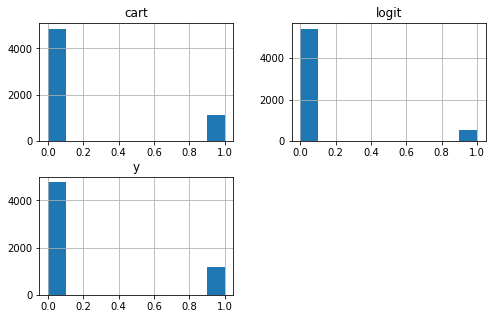

In [56]:
# We collect predictions into a dataframe for easy visualization
df_pred = pd.DataFrame({'y': y, 'cart':tree.predict(X), 'logit': logit.predict(X)})  
df_pred.hist();

Insights?
Well, the plot of $y$ reminds us that our target variable is binary. We also learn that the `predict()` function produces a bianry output. This is because we call this function on model objects that represent binary classifiers. **So, the output of `predict()` matches the type of the target variable.** Arguably, this is the behavior we would expect. So why stressing it. The reason is that, in classification, we typically do not want a discrete output. Instead, we typically want a **numeric prediction that represents the class-membership probability of a data point**. The most important accuracy indicators require probabilistic (or at least numeric) predictions. Further, the translation from a probabilistic prediction into a discrete class prediction should be done manually and in consideration of the different costs associated with misclassifying data points. We will further elaborate on this point in the chapter on [imbalanced and cost-sensitive learning](https://github.com/Humboldt-WI/bads/blob/master/tutorials/11_nb_imbalance_n_costs.ipynb). For now, it is enough to know that `sklearn` model classes also offer a method `predict_prob()`, which provides probabilistic predictions. We will typically use this function when applying a model to data. Watch out that the output of `predict_prob()` for binary classification models is a 2D array. We obtain the estimated membership probabilities for both classes. Yes, that appears odd since, e.g., $p_{GOOD} = 1 - p_{BAD}$. However, the function also supports multi-class problems. For multi-class problems, you would indeed want to know the membership probability associated with each class.   

In [57]:
# Add probabilistic predictions to our dataframe
p = logit.predict_proba(X)
print(p)  # this is a 2D array

[[0.68156773 0.31843227]
 [0.28383127 0.71616873]
 [0.72952638 0.27047362]
 ...
 [0.94108985 0.05891015]
 [0.94531214 0.05468786]
 [0.94664408 0.05335592]]


When storing model predictions for later use, we only need probabilities for one of the classes. Always make sure you **understand which class predictions you keep.**. Examining the `classess` attribute of a model class helps us.   

In [58]:
print(logit.classes_)

[0 1]


This says that we have two classes with class labels zero and one, respectively. Thus, to extract the estimated probabilities of the class with label zero, we can call `p[:,0]`. Likewise, `p[:,1]` gives the estimated membership probabilities of the second class with the label one. This is a bit complicated in the beginning but we have to get used to it. Below, we combine the indexing directly with calling `predict_proba()`, which is common practice, and keep the predictions associated with the second class. In our data, the class label one indicates that a borrower was a bad risk.

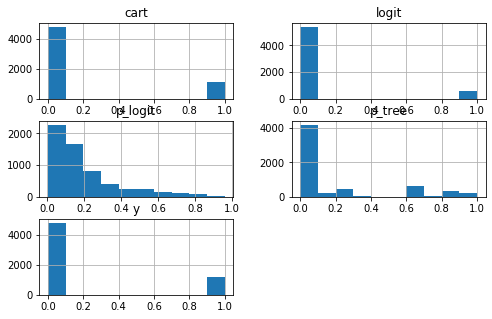

In [59]:
# Augment data frame with predictions
df_pred["p_logit"] = p[:,1]
df_pred["p_tree"] = tree.predict_proba(X)[:,1]
df_pred.hist();

## Measures of predictive accuracy 
Accuracy indicators help us evaluate how well our model predicts the target. We compute them by comparing actuals to predictions. One easy way to do so is by using the `score()` function.

In [60]:
print('Logit model scores {:.4}'.format(logit.score(X, y)))
print('Tree model scores {:.4}'.format(tree.score(X, y)))

Logit model scores 0.8245
Tree model scores 0.8913


Wow, so easy. Really? What actually is that score? Are higher scores better or should the score be low? We call functions like `score()` convenience functions. They are easy to use but hide many - often important - details. Look into the help to see what `score()` is really computing. 

We just asked you to look into the help. Don't be ignorant. Go back to the help before reading on. Pause.

In [61]:
import time
time.sleep(5)

Ok, **after reading the help** you now know that `score()` calculates *classification accuracy*. We defined that measure in the lecture. Let's first revisit the calculation

In [62]:
# Re-calc accuracy of logit
acc = np.sum(logit.predict(X)==y) / len(y)  # just one way to do the calculation
print("Manually calculated accuracy: {:.4}".format(acc))

Manually calculated accuracy: 0.8245


Ok that worked out. Now remember that we were rather critical with classification accuracy in the lecture. Let's revisit why we do not like this measure.

Classification accuracy is a threshold metric. It calculates model performance for one threshold or classification cut-off. If not specified, this threshold is usually set to 0.5. That's also what the `predict()` function does. Changing the threshold can change the accuracy a lot although the model stays the same. This is particularly true in imbalanced data sets like this one. Let me give you an exemplary scenario: We have 100 observations. 5 observations are of the class 'BAD' and 95 of the class 'GOOD'. So even without finding any generalizable patterns, classifying all observations as good would still result in an accuracy of 95%. To ensure robustness of our model, we want to avoid dependence of a performance measure on the cut-off.

A preferable approach to assess classification performance is to consider all possible thresholds. This is what *receiver-operating-characteristics (ROC) analysis* does. Before looking into ROC, let's have a look at the full confusion table first, which will also remind us of the role of the threshold.

### Confusion matrix
A confusion matrix is a cross-table of predicted and actual classes. As such, it provides more insight into a classifier compared to the classification accuracy measure, which summarizes the whole confusion table in a single number.

In [63]:
from sklearn import metrics  # Important lib where we find various performance measures

# 1. Quick and dirty way to get a confusion table
cmat = metrics.confusion_matrix(y, sk_logit.predict(X))
print(cmat)

[[4568  203]
 [ 843  346]]


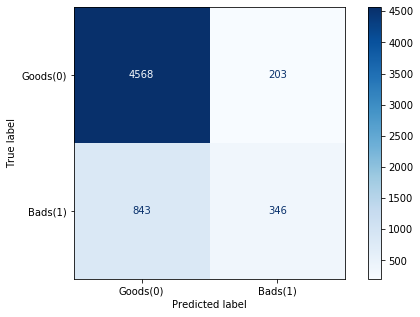

In [64]:
# 2. Pretty-print confusion matrix
plt.rcParams["figure.figsize"] = (8,5)
metrics.plot_confusion_matrix(logit, X, y, labels=[0, 1], display_labels=['Goods(0)', 'Bads(1)'], cmap='Blues',values_format='n')
plt.show()

Classification accuracy simply calculates the number of correct class predictions (main diagonal) over all cases. Again, which class a model predicts depends on the classification threshold. You classify cases as BAD if $p(y=BAD|x) \gt \tau$, where $\tau$ denotes the threshold. 

Hence, the above confusion table is based on one threshold, and might look rather different for another. A ROC curve considers all cut-offs $\tau \in [0,1]$ plotting the True Positive Rate and False Positive Rate for each threshold.

### ROC Curve and AUC

This is one of the most important evaluation metrics in classification analysis. Have a look at the graph below. The curve tells us how well the model differentiates the two classes, in regards to their predicted probabilities. A ROC curve has the FPR on the X-axis and FPR on the Y-axis. The curve is made up out of all the different combinations of TPR and FPR across all thresholds.

The AUC stand for the Area under the Curve and is a ranking indicator. The AUC estimates the probability that a randomly chosen positive instance is correctly ranked higher than a randomly chosen negative (Hanley and McNeil, 1983) . We calculate this area, as our goal is to have a FPR of 0 and a TPR of 1. This would be the perfect model. This point is in the top right corner of a ROC Curve. So the closer we get to that point, the better the model and the bigger the area under it. It is common practice to add a horizontal line to the plot. You can show that this line corresponds to a random classifier. So any serious model should give a ROC curve (much) above the horizontal line. This also implies that a classifier should display AUC (much) bigger than 0.5.

Below we show different way to plot the ROC curve.

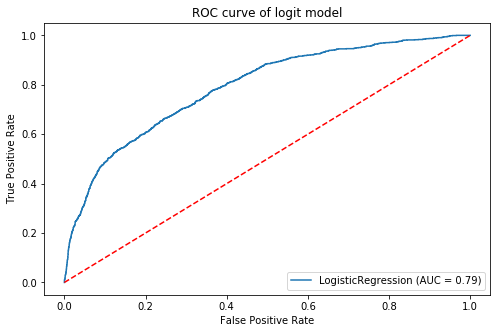

In [65]:
# Scikit-learn offers an easy-to-use function to produce a ROC curve. 
metrics.plot_roc_curve(logit, X, y)
plt.title('ROC curve of logit model')
plt.plot([0, 1], [0, 1], "r--");  # the random benchmark we need to add manually

If you want a little more control, for example to depict the training and test set results in one chart, you can proceed as follows: 

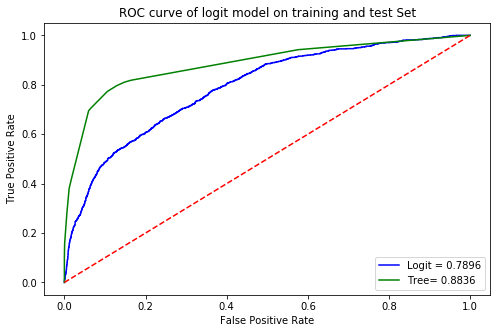

In [66]:
# Example how to 'manually' plot the ROC curve
fpr, tpr, _ = metrics.roc_curve(y, df_pred['p_logit'].values)  # extracting FPR and TPR for the logit model
fpr_tr, tpr_tr, _ = metrics.roc_curve(y, df_pred['p_tree'].values)  # same for the tree model

# Compute AUC
auc = metrics.auc(fpr, tpr) 
auc_tr = metrics.auc(fpr_tr, tpr_tr)

# ROC curve:
plt.plot(fpr, tpr, "b", label="Logit = %0.4f" % auc)
plt.plot(fpr_tr, tpr_tr, "b", label="Tree= %0.4f" % auc_tr, color='green')

# Random benchmark
plt.plot([0, 1], [0, 1], "r--");  

# Plot configuration
plt.title('ROC curve of logit model on training and test Set')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Brier score
Last but not least, the lecture introduced the *Brier score* as the mean-squared error of a zero-one encoded target variable and probabilistic model predictions. Let's see which of our models does better in terms of Brier score.

In [67]:
bs_logit = np.sum( (y - df_pred['p_logit'].values) **2) / len(y)
print("Brier score of logit: {:.4}".format(bs_logit))

bs_tree = np.sum( (y - df_pred['p_tree'].values) **2) / len(y)
print("Brier score of the tree: {:.4}".format(bs_tree))

Brier score of logit: 0.127
Brier score of the tree: 0.08434


The Brier score is an error measure. Lower values indicate better performance. So, we once again find the tree to do better. As a matter of fact, **it was almost certain that the tree would perform better.** Any ideas why this is the case? If yes, pad yourself on the shoulder. You have really understood what predictive modeling is about.

## Data partitioning and organization
Still searching for an answer to the above question why the tree was expected to beat logit? Want some help? The answer has to do with the data we used for calculating predictions and, by extension, model assessment. Specifically, we used the same data for model training and model evaluation. The lecture elaborates on why this is a bad idea, and our empirical results from the previous part kinda confirm that. Go back to the previous part and re-run the codes. This time, however, set the argument `max_depth` for the tree classifier to 10. What do you observe? 

Remember the golden rule of predictive modeling. **To assess a model, we need fresh data**. To that end, our model evaluation pipelines routinely include sample splitting and cross-validation. 

### TODO Split sample approach
My idea:

- showcase manual split sample comparison of logit vs tree using auc
- repeat using sklearn train_test split

### Cross-validation
Cross validation is an extended approach of the split sample method. It consists of repeating the split sample method multiple times.

Step by step:
- Randomly split data in N disjoint folds (E.g., N=5) 
- Build model on N-1 folds and validate that model on the remaining fold 
- Apply trained model to predict cases in the validation sample (hold-out data) 
- Measure model performance 
- Repeat N times and average 
- Average model performance over validation folds gives performance estimate 
- Can also estimate standard deviation (e.g., for statistical hypothesis testing)

#### TODO Cross-validation by hand
- showcase random partitioning into the N folds 
- also enumerate the loop building an assessing one model in each iteration
- print mean and std auc

- Next introduce StratifiedKFold. Code below should do the job. We still adopt a rather manual approach this is to shed light what sklearn function do internally, i.e. what kind of data structure we get from `StratifiedKFold()`
- Last, showcase higher-level functions that simplify CV further


Kindly also add explanations :) 


Cross-validating the logit model:
	CV iter: 0 with AUC=0.7767912196325071
Average AUC on test set during cross-validation: 0.7768
	CV iter: 1 with AUC=0.7719288973451016
Average AUC on test set during cross-validation: 0.7744
	CV iter: 2 with AUC=0.7543117876081251
Average AUC on test set during cross-validation: 0.7677
	CV iter: 3 with AUC=0.7867096524144249
Average AUC on test set during cross-validation: 0.7724
	CV iter: 4 with AUC=0.7855469231717844
Average AUC on test set during cross-validation: 0.7751
	CV iter: 5 with AUC=0.7816887761393865
Average AUC on test set during cross-validation: 0.7762
	CV iter: 6 with AUC=0.7800856191533218
Average AUC on test set during cross-validation: 0.7767
	CV iter: 7 with AUC=0.8265771717492028
Average AUC on test set during cross-validation: 0.7830
	CV iter: 8 with AUC=0.8060003875764141
Average AUC on test set during cross-validation: 0.7855
	CV iter: 9 with AUC=0.7125381178639814
Average AUC on test set during cross-validation: 0.7782


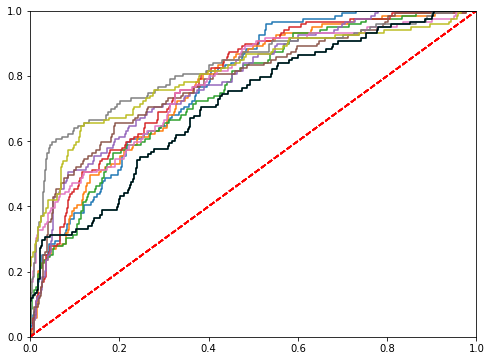

In [69]:
# Demo from another course, maybe adapt, and explain

from sklearn.model_selection import StratifiedKFold

# Setup cross-validation and data structures to store results
nfold = 10
resultscv = list()
cv = StratifiedKFold(n_splits=nfold)
cv_auc_val = np.zeros(nfold)
cv_auc_val[cv_auc_val == 0] = 'nan' #for now, to avoid 0 values to be taken into account for, help ? average
cv_auc_train = np.zeros(nfold)
fpr_cv = {}
tpr_cv= {}
thresholds = {}

# Configure the plot we are about to create 
plt.figure(figsize=[8,6])
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])

print('Cross-validating the logit model:')
for i, (tr_idx, vl_idx) in enumerate(cv.split(X, y)):
    xtr, xvl = X.iloc[tr_idx], X.iloc[vl_idx]
    ytr, yvl = y[tr_idx], y[vl_idx]
    logit.fit(xtr, ytr)
    temp = logit.predict_proba(xvl)[:, 1]
    fp_rate_cv, tp_rate_cv, threshold = metrics.roc_curve(yvl, temp.astype('float'))
    thresholds[i] = threshold
    fpr_cv[i] = fp_rate_cv
    tpr_cv[i] = tp_rate_cv
    cv_auc_val[i] = metrics.auc(fp_rate_cv, tp_rate_cv)
    print('\tCV iter: {} with AUC={}'.format(i, cv_auc_val[i]))
    print('Average AUC on test set during cross-validation: {:.4f}'.format(np.nanmean(cv_auc_val)))
    
    # Print ROC curve
    plt.plot(fp_rate_cv,tp_rate_cv)
    plt.plot([0, 1], [0, 1], "r--")
    
    #save training performance for evaluation
    temp=logit.predict_proba(xtr)[:, 1]
    fp_rate, tp_rate, _ = metrics.roc_curve(ytr, temp.astype('float'))
    cv_auc_train[i] = metrics.auc(fp_rate, tp_rate)


mean_fp_rate_cv = pd.DataFrame(np.vstack(fp_rate_cv))
mean_tp_rate_cv = pd.DataFrame(np.vstack(tp_rate_cv))

plt.plot(mean_fp_rate_cv, mean_tp_rate_cv, color='black')    
plt.show()